# Homework 4 - Group 5
## Question 1
### 1.1)

In [12]:
import pandas as pd
from pydataset import data
df = data('Housing')

def get_col(row):
    if row['price'] > df['price'].median():
        return 1
    else:
        return 0
    
def convert_dummy(col,row):
    if row[col] == 'yes':
        return 1
    else:
        return 0
    
df.head(4)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500,4000,2,1,1,yes,no,no,no,no,0,no
3,49500,3060,3,1,1,yes,no,no,no,no,0,no
4,60500,6650,3,1,2,yes,yes,no,no,no,0,no


### 1.2)

In [13]:
df['price_01'] = df.apply (lambda row: get_col(row),axis=1)
df['driveway'] = df.apply(lambda row: convert_dummy('driveway',row),axis=1)
df['recroom'] = df.apply(lambda row: convert_dummy('recroom',row),axis=1)
df['fullbase'] = df.apply(lambda row: convert_dummy('fullbase',row),axis=1)
df['gashw'] = df.apply(lambda row: convert_dummy('gashw',row),axis=1)
df['airco'] = df.apply(lambda row: convert_dummy('airco',row),axis=1)
df['prefarea'] = df.apply(lambda row: convert_dummy('prefarea',row),axis=1)

df.head(4)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,price_01
1,42000,5850,3,1,2,1,0,1,0,0,1,0,0
2,38500,4000,2,1,1,1,0,0,0,0,0,0,0
3,49500,3060,3,1,1,1,0,0,0,0,0,0,0
4,60500,6650,3,1,2,1,1,0,0,0,0,0,0


### 1.3)

In [14]:
import numpy as np
from sklearn.cross_validation import train_test_split

X = df[['bedrooms','bathrms','fullbase']].values
y = df.price_01.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 1.4)

In [32]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.71270718232044195

### 1.5)

In [34]:
tree.export_graphviz(clf, out_file='tree.dot') 

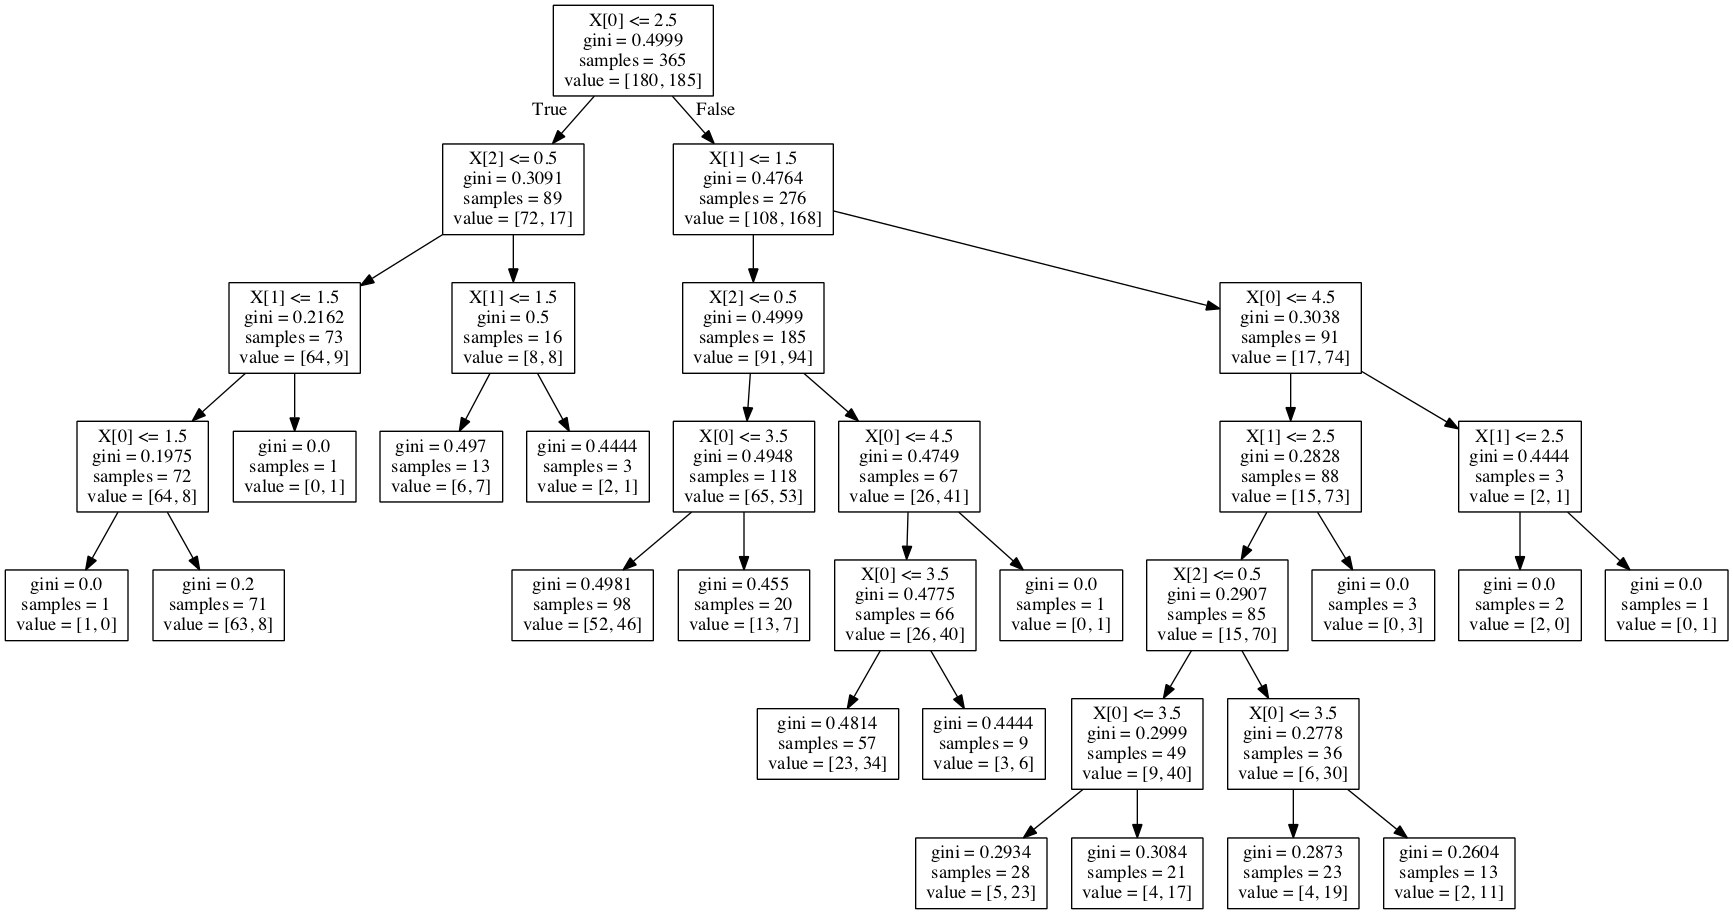

In [35]:
from IPython.display import Image
Image(filename='tree.png') 

## Question 2
### 2.1) Bayes Optimal Decision Boundary:
$$P(C_1|x) = P(C_2|x)$$

$$\frac{P(C_1)*p(\textbf{x}|C_1)}{p(\textbf{x})}=\frac{P(C_2)*p(\textbf{x}|C_2)}{p(\textbf{x})}$$

$$\frac{1}{5}*\frac{1}{2\pi\sqrt{|\Sigma|}*e^{\frac{1}{2}(\textbf{x} - \mathbf{\mu_1})^{T}\Sigma^{-1}(\textbf{x} - \mathbf{\mu_1})}}=\frac{4}{5}*\frac{1}{2\pi\sqrt{|\Sigma|}*e^{\frac{1}{2}(\textbf{x} - \mathbf{\mu_2})^{T}\Sigma^{-1}(\textbf{x} - \mathbf{\mu_2})}}$$

$$\frac{1}{e^{\frac{1}{2}{\{(x_1 - 2)^2+x_2^2\}}}}=\frac{4}{e^{\frac{1}{2}{\{x_1^2+(x_2 - 2)^2\}}}}$$

$$-\frac{1}{2}\{x_1^2+x_2^2-4x_1+4\}=ln(4)-\frac{1}{2}\{x_1^2+x_2^2-4x_2+4\}$$


#### The Bayes Optimal Decision Boundary is the line:
$$x_2=x_1 - \frac{ln(4)}{2}$$

### 2.2) If the cost of mistaking a C1 input for a C2 input is twice as high as mistaking a C2 input for a C1 input:
#### Move the boundary to the point where 2*p(x, C1) = p(x, C2).
$$x_2=x_1 - \frac{ln(2)}{2}$$

## Question 3
### 3.1)

In [16]:
df = data('Caschool')

def get_dummy_col(row):
    if row['testscr'] > df['testscr'].median():
        return 1
    else:
        return 0

df['test_score_01'] = df.apply (lambda row: get_dummy_col(row),axis=1)
df.head(3)

,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr,test_score_01
1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,1
2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,1
3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,0


### 3.2)

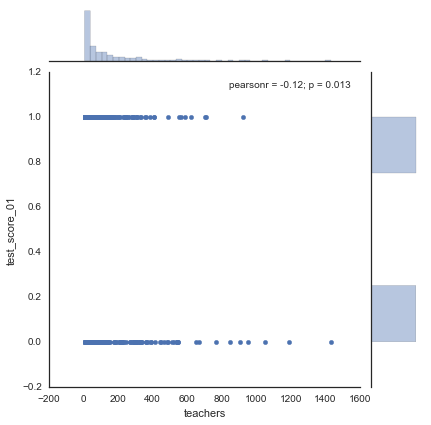

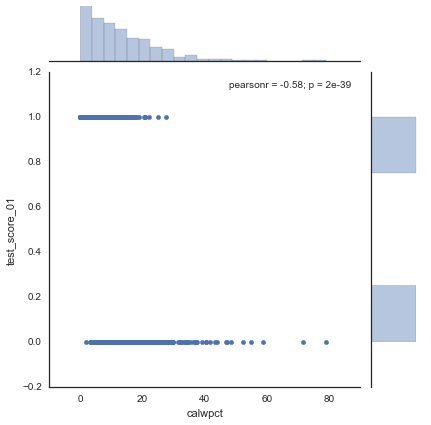

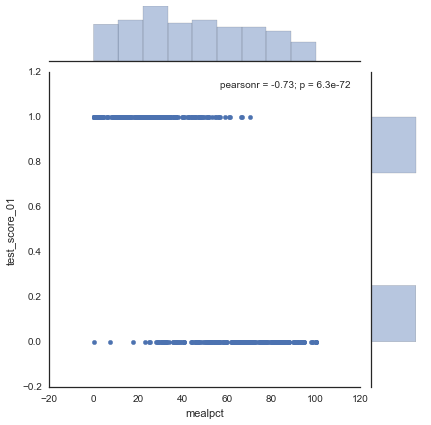

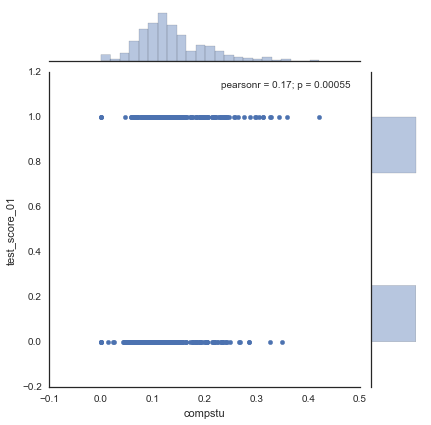

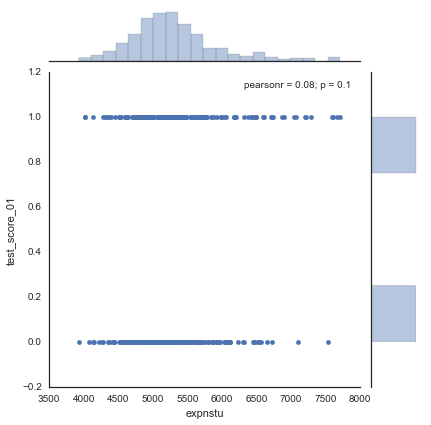

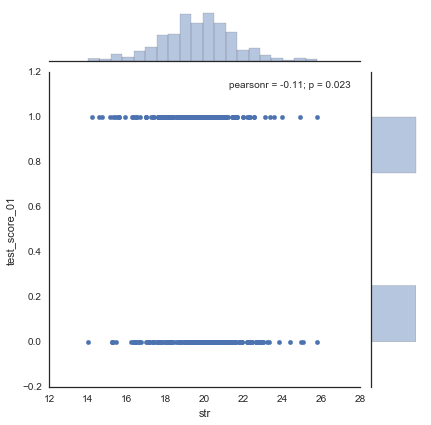

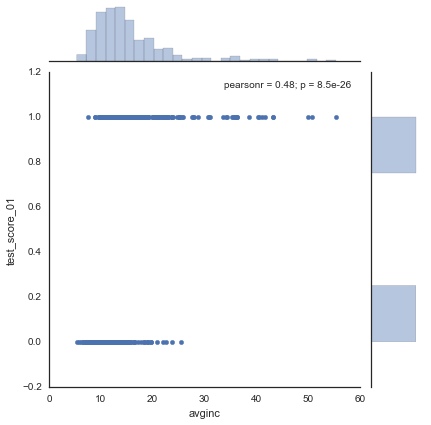

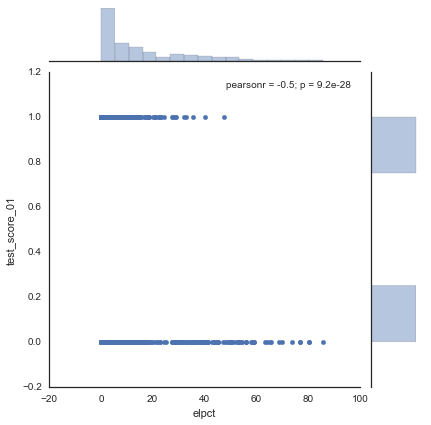

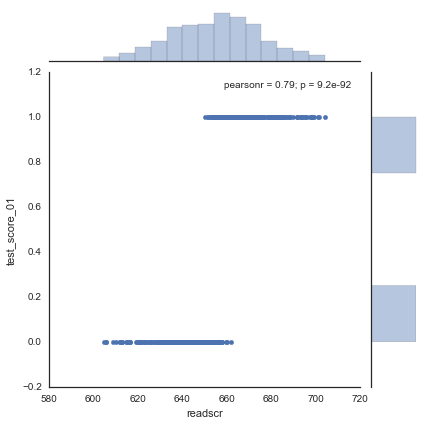

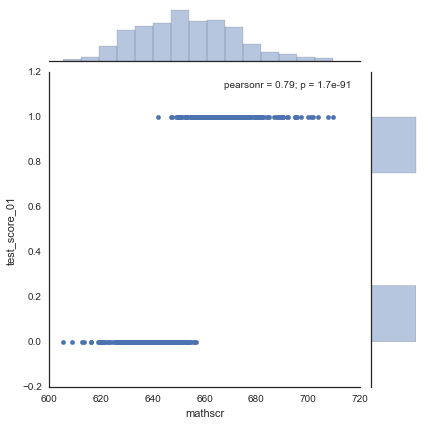

In [10]:
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

pltdata = df[['teachers','test_score_01']]
g = sns.jointplot(x="teachers", y="test_score_01", data=pltdata)

pltdata = df[['calwpct','test_score_01']]
g = sns.jointplot(x="calwpct", y="test_score_01", data=pltdata)

pltdata = df[['mealpct','test_score_01']]
g = sns.jointplot(x="mealpct", y="test_score_01", data=pltdata)

pltdata = df[['compstu','test_score_01']]
g = sns.jointplot(x="compstu", y="test_score_01", data=pltdata)

pltdata = df[['expnstu','test_score_01']]
g = sns.jointplot(x="expnstu", y="test_score_01", data=pltdata)

pltdata = df[['str','test_score_01']]
g = sns.jointplot(x="str", y="test_score_01", data=pltdata)

pltdata = df[['avginc','test_score_01']]
g = sns.jointplot(x="avginc", y="test_score_01", data=pltdata)

pltdata = df[['elpct','test_score_01']]
g = sns.jointplot(x="elpct", y="test_score_01", data=pltdata)

pltdata = df[['readscr','test_score_01']]
g = sns.jointplot(x="readscr", y="test_score_01", data=pltdata)

pltdata = df[['mathscr','test_score_01']]
g = sns.jointplot(x="mathscr", y="test_score_01", data=pltdata)

mathscr and readscr are obviously the best predictors of test_score_01. avginc, elpct, mealpct, and calwpct all appear to be weak predictors of test_score_01.

### 3.3)

In [17]:
X = df[['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'avginc']]
y = df['test_score_01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 3.4)

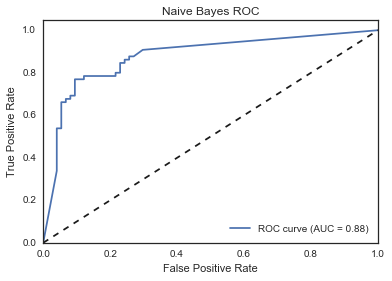

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_prob = mnb.predict_proba(X_test)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC')
plt.legend(loc="lower right")
plt.show()

### 3.5)

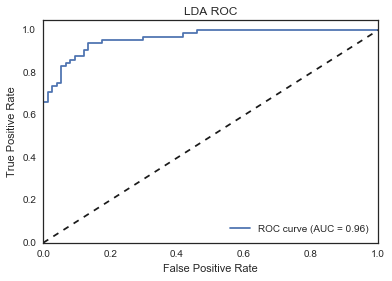

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC')
plt.legend(loc="lower right")
plt.show()

### 3.6)

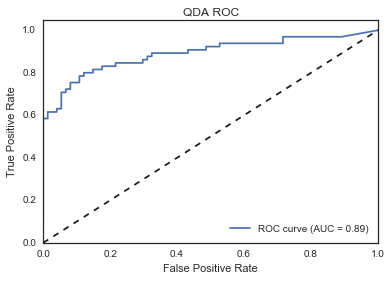

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('QDA ROC')
plt.legend(loc="lower right")
plt.show()

### 3.7)
LDA appears to be the best fit for the data in this example with both the largest AUC as well as the steepest initial TPR/FPR and covers the most area in the top left section of the plot. QDA is the second best fit with an AUC 1% greater than Naiv